In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ks_2samp
from scipy.stats import mannwhitneyu
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from superlinked import framework as sl
from datetime import timedelta, datetime


pd.set_option('display.max_columns', None)
data = pd.read_csv('/home/elbaz/Bureau/TMDB_movie_dataset_v11.csv')

2025-07-20 14:29:18 [debug    ] YAML configuration not available, falling back to dotenv error=KeyError('yaml_config_section key "framework" not found in config.yaml')
2025-07-20 14:29:18 [debug    ] YAML configuration not available, falling back to dotenv error=KeyError('yaml_config_section key "resource" not found in config.yaml')
2025-07-20 14:29:18 [debug    ] YAML configuration not available, falling back to dotenv error=KeyError('yaml_config_section key "resource" not found in config.yaml')
2025-07-20 14:29:18 [debug    ] YAML configuration not available, falling back to dotenv error=KeyError('yaml_config_section key "resource" not found in config.yaml')


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258464 entries, 0 to 1258463
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1258464 non-null  int64  
 1   title                 1258451 non-null  object 
 2   vote_average          1258464 non-null  float64
 3   vote_count            1258464 non-null  int64  
 4   status                1258464 non-null  object 
 5   release_date          1017599 non-null  object 
 6   revenue               1258464 non-null  int64  
 7   runtime               1258464 non-null  int64  
 8   adult                 1258464 non-null  bool   
 9   backdrop_path         324813 non-null   object 
 10  budget                1258464 non-null  int64  
 11  homepage              131364 non-null   object 
 12  imdb_id               631279 non-null   object 
 13  original_language     1258464 non-null  object 
 14  original_title        1258451 non-

In [3]:
data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


We can clean this data as first step and keep the most relevant part. Some features are not necessary for this analysis and we can make also some consideration or focus on the dataset, like focusing only on english movies. 

Clean dataset from unwanted variables

In [4]:
# variable status
data.status.value_counts(dropna=False)

status
Released           1222687
In Production        15220
Post Production      10975
Planned               8758
Rumored                499
Canceled               325
Name: count, dtype: int64

I dont care about non released movies. Neither about adult movies

In [5]:
# variable adult
data.adult.value_counts(dropna=False)

adult
False    1135178
True      123286
Name: count, dtype: int64

In [6]:
# variable original language
data.original_language.value_counts(dropna=False, normalize=True)

original_language
en    5.441220e-01
fr    5.848797e-02
es    5.115522e-02
de    4.638988e-02
ja    4.389001e-02
          ...     
an    7.946195e-07
rn    7.946195e-07
ts    7.946195e-07
kg    7.946195e-07
ii    7.946195e-07
Name: proportion, Length: 176, dtype: float64

Half of the movies are in english then it goes to 5% for french...

In [7]:
# variable spoken languages when original language is english
data[data.original_language == 'en'].spoken_languages.value_counts(dropna=False, normalize=True)

spoken_languages
NaN                                    0.556559
English                                0.359229
No Language                            0.022326
Spanish                                0.003616
English, Spanish                       0.003343
                                         ...   
Arabic, Norwegian                      0.000001
Hungarian, Italian                     0.000001
Vietnamese, Mandarin                   0.000001
Bulgarian, English, German, Russian    0.000001
Belarusian, English, Hebrew            0.000001
Name: proportion, Length: 3144, dtype: float64

We have 80% of english original movies language speaking in english, let s assume we can get rid of this feature keep all movies in english.

In [8]:
# filter data
data = data[(data.original_language == 'en')&
            (data.status == 'Released')&
            (data.adult == False)&
            (data.release_date.notna())].drop(columns=['original_language', 'spoken_languages', 'status', 'adult', "backdrop_path", "homepage", "imdb_id", "poster_path"])


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446438 entries, 0 to 1258452
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    446438 non-null  int64  
 1   title                 446434 non-null  object 
 2   vote_average          446438 non-null  float64
 3   vote_count            446438 non-null  int64  
 4   release_date          446438 non-null  object 
 5   revenue               446438 non-null  int64  
 6   runtime               446438 non-null  int64  
 7   budget                446438 non-null  int64  
 8   original_title        446434 non-null  object 
 9   overview              435749 non-null  object 
 10  popularity            446438 non-null  float64
 11  tagline               102517 non-null  object 
 12  genres                308625 non-null  object 
 13  production_companies  194172 non-null  object 
 14  production_countries  236103 non-null  object 
 15  keyw

# Does release date affects votes (count and average) ?

Indepandently to all others features, we want to know if the release date or moment in the year affect positively or negatively the vote

In [10]:
data[['vote_count', 'vote_average']].describe()

,vote_count,vote_average
count,446438.000000,446438.000000
mean,40.679575,2.169500
std,499.386887,3.114875
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,5.083000
max,34495.000000,10.000000


/home/elbaz/Bureau/tmdb_data_eda/.venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/elbaz/Bureau/tmdb_data_eda/.venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


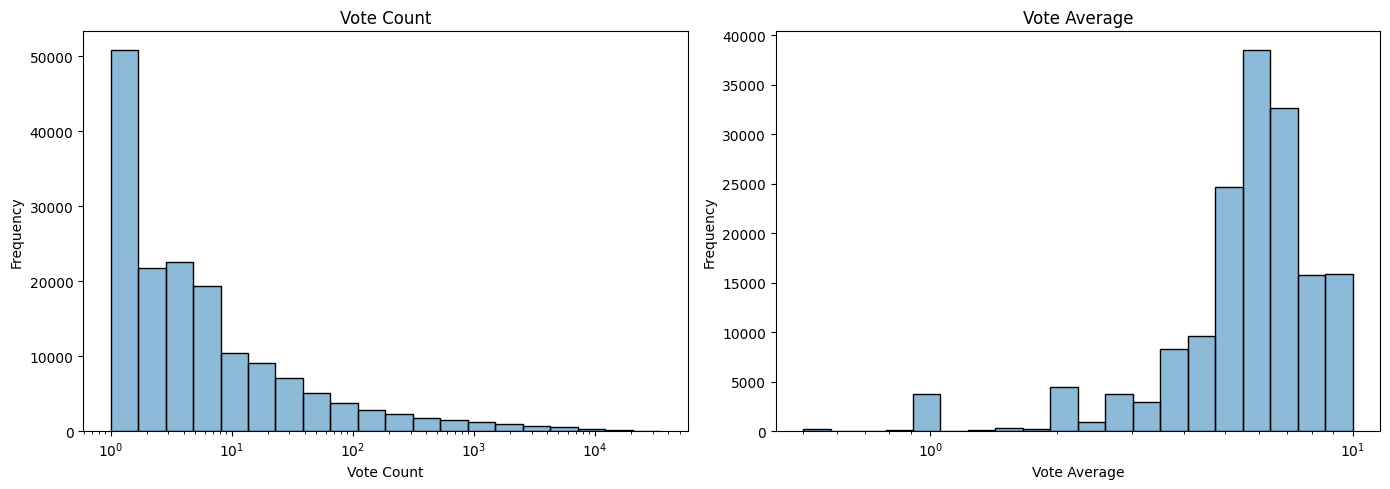

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

votes = data[['vote_count', 'vote_average']].replace([np.inf, -np.inf], np.nan).dropna()

sns.histplot(votes, x="vote_count", bins=20, kde=True, log_scale=True, ax=axes[0])
axes[0].set_title("Vote Count")
axes[0].set_xlabel("Vote Count")
axes[0].set_ylabel("Frequency")

sns.histplot(votes, x="vote_average", bins=20, kde=True, log_scale=True, ax=axes[1])
axes[1].set_title("Vote Average")
axes[1].set_xlabel("Vote Average")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

We see clearly that the two distribution look like power distribution skwed left then right.

In [12]:
# correlation with log transformation
np.log1p(data[['vote_count', 'vote_average']]).corr()

,vote_count,vote_average
vote_count,1.000000,0.696909
vote_average,0.696909,1.000000


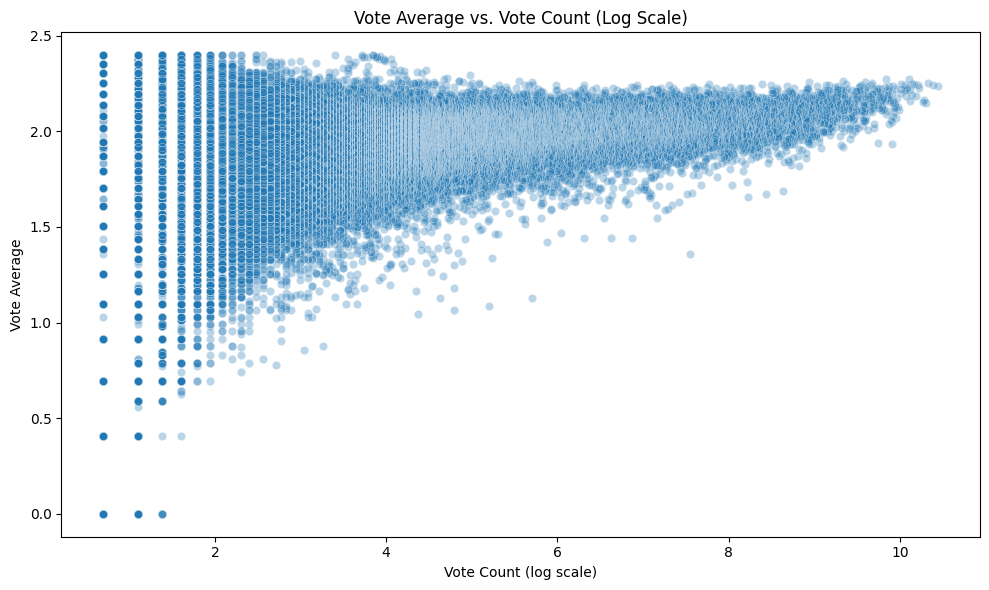

In [13]:
df_plot = np.log1p(data[data['vote_count'] > 0][['vote_count', 'vote_average']].dropna())

plt.figure(figsize=(10, 6))

# plot the relationshipe between vote count and vote average
sns.scatterplot(data=df_plot, x='vote_count', y='vote_average', alpha=0.3)

plt.xlabel('Vote Count (log scale)')
plt.ylabel('Vote Average')
plt.title('Vote Average vs. Vote Count (Log Scale)')
plt.tight_layout()
plt.show()

There is a trend defined. More a movie has votes more it seems to be appreciated by the public. In other words, people tend to vote for the movie they like.

In [14]:
# transform realease date to datetime
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# add a column for the month of the release
data['release_month'] = data['release_date'].dt.month_name()

# add a column for the year of the release
data['release_year'] = data['release_date'].dt.year

# add a column for the day of the release
data['release_day'] = data['release_date'].dt.day_name()

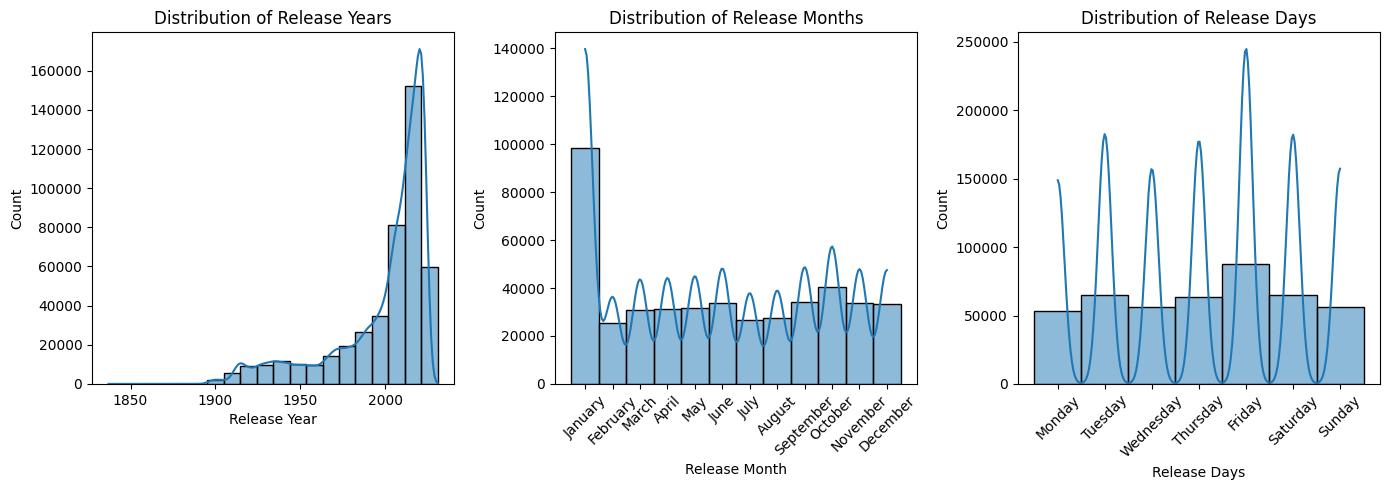

In [15]:
# insert order in mobths and years
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
data['release_month'] = pd.Categorical(data['release_month'], categories=month_order, ordered=True)

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data["release_day"] = pd.Categorical(data["release_day"], categories=days_order, ordered=True)

years = data.release_year
months = data.release_month
days = data.release_day


# plot distribution movies releases per years, months and days
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

sns.histplot(years, bins=20, kde=True, log_scale=False, ax=axes[0])
axes[0].set_title("Distribution of Release Years")
axes[0].set_xlabel("Release Year")
axes[0].set_ylabel("Count")

sns.histplot(months, bins=20, kde=True, log_scale=False, ax=axes[1])
axes[1].set_title("Distribution of Release Months")
axes[1].set_xlabel("Release Month")
axes[1].set_ylabel("Count")

sns.histplot(days, bins=20, kde=True, log_scale=False, ax=axes[2])
axes[2].set_title("Distribution of Release Days")
axes[2].set_xlabel("Release Days")
axes[2].set_ylabel("Count")

plt.setp(axes[1].get_xticklabels(), rotation=45)
plt.setp(axes[2].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

We first of al see that there is more and more movies release along the years. This is denoted a new pattern of cinema studios and more and more investiment in the cinema industry. 

We have a peak of releases during the month of January - why ? 

We see here that the release of movies is quite uniform along the days but we see also a slight peak on Friday, this can be due to probably the weekend. 

try to explain this gap in January from release year distribution

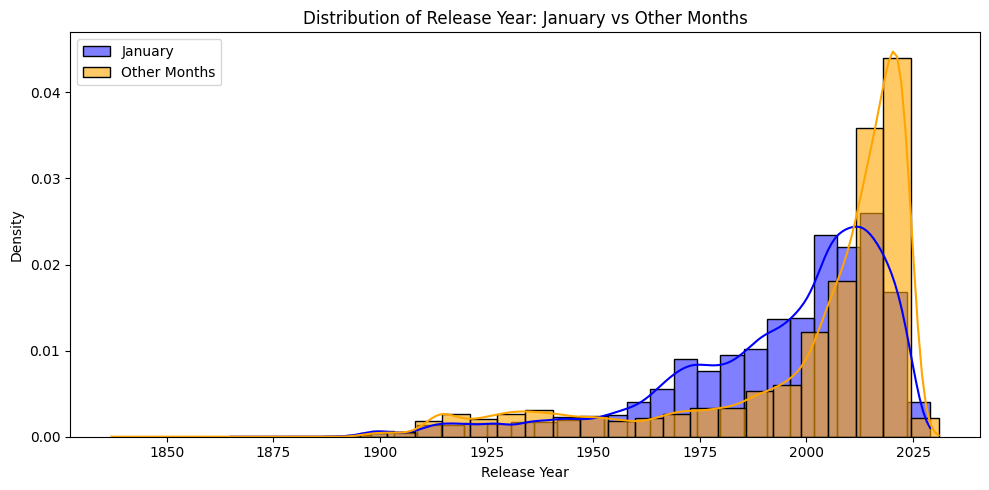

KS Statistic: 0.2501
P-Value: 0.0000
✅ The distributions are significantly different (reject H0).


In [16]:
# Split dataset
january_movies = data[data['release_month'] == 'January']
other_movies = data[data['release_month'] != 'January']

# Plot distributions of release_year
plt.figure(figsize=(10, 5))

sns.histplot(january_movies['release_year'], bins=30, color='blue', label='January', kde=True, stat='density')
sns.histplot(other_movies['release_year'], bins=30, color='orange', label='Other Months', kde=True, stat='density', alpha=0.6)

plt.title("Distribution of Release Year: January vs Other Months")
plt.xlabel("Release Year")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Extract the release years as arrays (drop NaNs)
x = january_movies['release_year'].dropna()
y = other_movies['release_year'].dropna()

# Perform the two-sample KS test
ks_stat, p_value = ks_2samp(x, y)

print(f"KS Statistic: {ks_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("✅ The distributions are significantly different (reject H0).")
else:
    print("🟡 The distributions are not significantly different (fail to reject H0).")

The KS statistic, or Kolmogorov-Smirnov statistic, is a measure used in the Kolmogorov-Smirnov test to assess the similarity between two probability distributions. It quantifies the maximum vertical distance between the cumulative distribution functions (CDFs) of the two distributions being compared. Essentially, it helps determine how different two distributions are by measuring the largest discrepancy between their cumulative probabilities. 

We reject the null hypothesis.

There is strong evidence that the distribution of release years in January is different from that in the other months.

This supports your hypothesis:
January is disproportionately populated with older movies, especially pre-2000 ones.



what would be the minimale year include ? to smooth the distribution on release month, to get it uniform

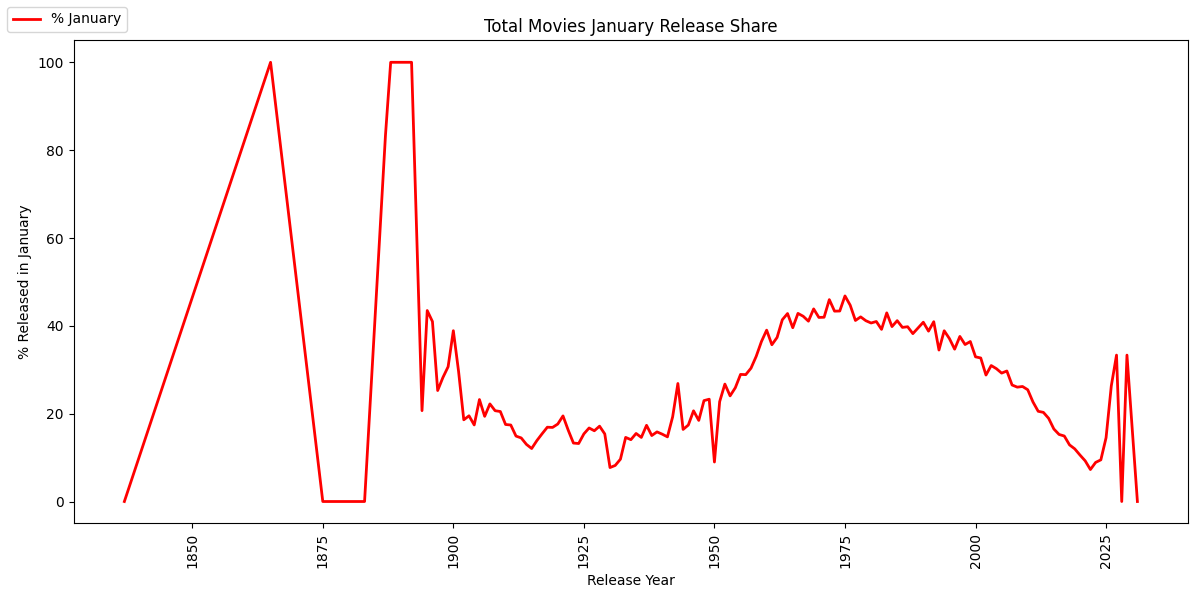

In [17]:
# Group by release year
year_counts = data.groupby('release_year').size()
january_counts = data[data['release_month'] == 'January'].groupby('release_year').size()

# Combine into one DataFrame
year_df = pd.DataFrame({
    'total': year_counts,
    'january': january_counts
}).fillna(0)

# Calculate % of January movies per year
year_df['jan_percent'] = 100 * year_df['january'] / year_df['total']

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))
year_df['jan_percent'].plot(ax=ax1, color='red', label='% January', linewidth=2)

# Labels
ax1.set_xlabel('Release Year')
ax1.set_ylabel('% Released in January')
ax1.set_title('Total Movies January Release Share')
fig.legend(loc='upper left')

plt.setp(ax1.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


Before 1980:

Extremely volatile and artificially high % of movies released in January — in some years it's over 50% or even 100%.

This strongly suggests default or placeholder dates, possibly due to missing metadata.


1980–1999:

Still elevated and noisy, but stabilizing.

January still over-represented in many years (30–40%).


2000 onward:

Much more stable.

January release share gradually declines below 20%, which feels realistic.


Let s take release_year>=1990 to include most of the modern hollywood cinema (John Doe, Tarantino, Die Hard 2, The matrix)

After research on the web apparently January month is called the dump month, it is the moment when studios release movies they are less confident in it. So let s investigate, using the popularity varibale.


In [18]:
# filter data
data = data[(data.release_year>=1990)&(data.release_year<=2025)]

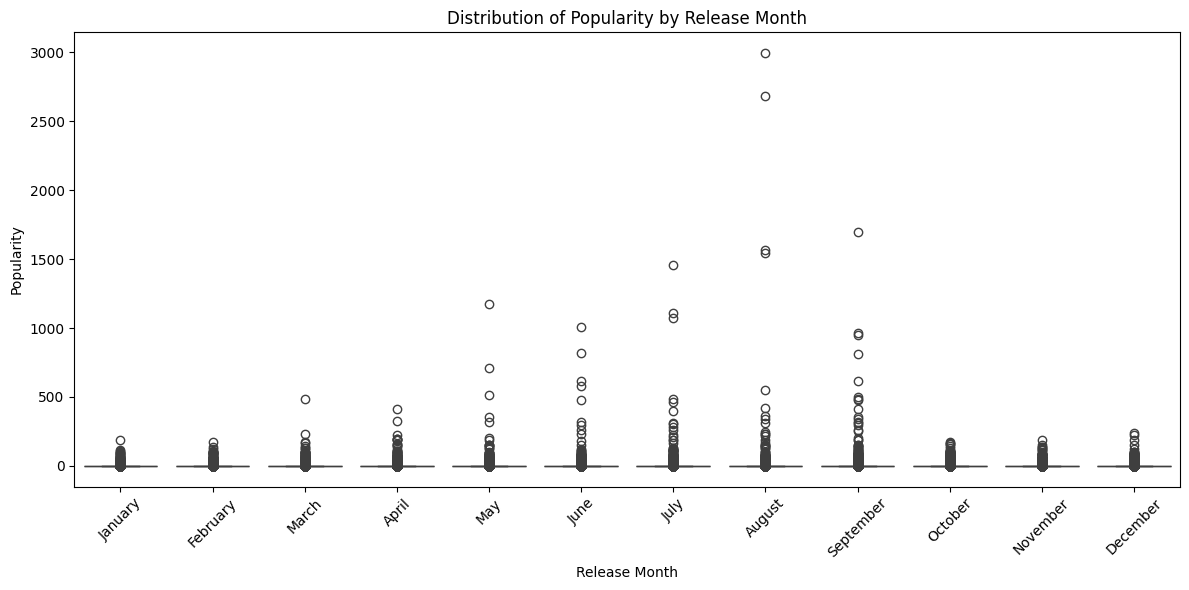

January median popularity: 0.47
Other months median popularity: 0.47
Mann–Whitney U statistic: 7537687693.50
P-value: 0.0000
✅ January movies have significantly lower popularity.


In [19]:
# plot boxplot of popularity per month
plt.figure(figsize=(12, 6))
sns.boxplot(x='release_month', y='popularity', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Popularity by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

# apply Mann–Whitney U test
jan_pop = np.log1p(data[data['release_month'] == 'January']['popularity'])
other_pop = np.log1p(data[data['release_month'] != 'January']['popularity'])
print(f"January median popularity: {jan_pop.median():.2f}")
print(f"Other months median popularity: {other_pop.median():.2f}")
stat, p = mannwhitneyu(jan_pop, other_pop, alternative='less')  # one-sided test

print(f"Mann–Whitney U statistic: {stat:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("✅ January movies have significantly lower popularity.")
else:
    print("🟡 No significant difference in popularity.")

The Mann-Whitney U test, also known as the Wilcoxon rank-sum test, is a non-parametric statistical test used to compare two independent groups. It determines if there's a statistically significant difference between the medians (or distributions) of the two groups, particularly when the data is not normally distributed or when the assumptions of parametric tests like the independent samples t-test are violated. 

Let s focus on how the time affect the vote count and vote average.

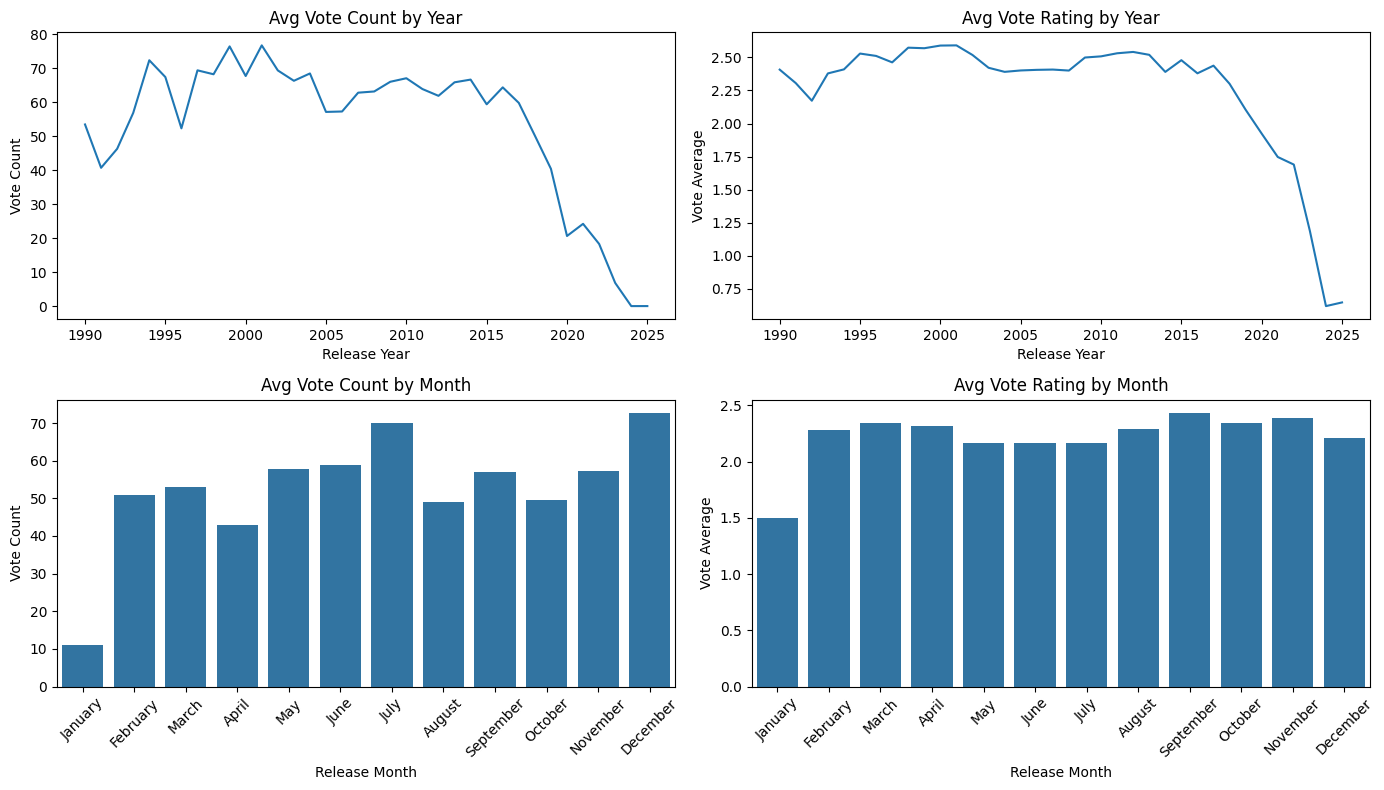

In [20]:
stats_years = data.groupby('release_year', observed=True).agg(
    avg_votes=('vote_count', 'mean'),
    avg_rating=('vote_average', 'mean'),
    n_movies=('id', 'count')
).reset_index()

stats_months = data.groupby('release_month', observed=True).agg(
    avg_votes=('vote_count', 'mean'),
    avg_rating=('vote_average', 'mean'),
    n_movies=('id', 'count')
).reset_index()

# Set plot style
# sns.set(style='whitegrid')

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Plot 1: Average vote count by year
sns.lineplot(data=stats_years, x='release_year', y='avg_votes', ax=axes[0, 0])
axes[0, 0].set_title('Avg Vote Count by Year')
axes[0, 0].set_xlabel('Release Year')
axes[0, 0].set_ylabel('Vote Count')

# Plot 2: Average vote rating by year
sns.lineplot(data=stats_years, x='release_year', y='avg_rating', ax=axes[0, 1])
axes[0, 1].set_title('Avg Vote Rating by Year')
axes[0, 1].set_xlabel('Release Year')
axes[0, 1].set_ylabel('Vote Average')

# Plot 3: Average vote count by month
sns.barplot(data=stats_months, x='release_month', y='avg_votes', ax=axes[1, 0])
axes[1, 0].set_title('Avg Vote Count by Month')
axes[1, 0].set_xlabel('Release Month')
axes[1, 0].set_ylabel('Vote Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Average vote rating by month
sns.barplot(data=stats_months, x='release_month', y='avg_rating', ax=axes[1, 1])
axes[1, 1].set_title('Avg Vote Rating by Month')
axes[1, 1].set_xlabel('Release Month')
axes[1, 1].set_ylabel('Vote Average')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Top Left: Average Vote Count by Year

What we see:
1. From 1990–2015: relatively high and stable average vote counts (between ~55 and 75).
2. From 2016–2022: clear downward trend, especially steep after 2020.

Interpretation:
1. Newer movies haven’t had enough time to accumulate votes → **recency bias**.
2. This decline is not quality-driven, but a data maturity issue.

**Suggestion**: Consider filtering out the last 3–5 years for some analyses.


Top Right: Average Vote Rating by Year

What we see:
1. Fairly stable rating ~2.4–2.6 from 1995 to 2018.
2. Dramatic drop after 2019, especially in 2021–2023.

Interpretation:
1. Again, possibly a data artifact — newer movies might:
2. Not have enough votes to average out rating bias.
3. Attract early ratings from fans/critics only.
4. post-pandemic changes in audience behavior or production quality?


Bottom Left: Average Vote Count by Month

What we see:
1. January has the lowest vote count — massive drop.
2. Summer (June–August) and December have the highest average vote counts.

Interpretation:
1. Confirms the “dump month” theory for January.
2. Blockbuster-heavy months like July and December get more attention → more votes.


Bottom Right: Average Vote Rating by Month

What we see:
1. January again at the bottom (~1.8 avg), while September and March–April are higher (~2.6).
2. Middle months vary slightly but don’t diverge much.

Interpretation:
1. Further supports the dump-month effect — January films tend to be lower rated.
2. Late summer and early fall might include festival, Oscar-contending, or better-reviewed films.


In [21]:
# apply suggestion
data = data[data.release_year<=data.release_year.max()-5]

If the years and the months affect the organization of the cinema studio and the release of their movies, I should see also this behavior in the budget and in the revenue. Also, the genre and the runtime of the movie will be affected. I suppose. 

Let's analyze how the budget, revenue, and runtime are affected through the years and also across the months of the year. Also, how through times the genre of the movie changes. What kind of movie are more released than before? Or is there a specific genre for a specific month. 

# Analyze Time vs Budget, Revenue, Runtime and Genres

How do release timing (year, month) influence budget, revenue, runtime, and genre?

In [22]:
#remove rows with budget/revenue = 0 (if relevant)
data = data[(data['budget'] > 0) & (data['revenue'] > 0) & (data['runtime'] > 0)]

In [23]:
# Aggregate stats by year and month
stats_years = data.groupby('release_year', observed=True).agg(
    avg_budget=('budget', 'mean'),
    avg_revenue=('revenue', 'mean'),
    avg_runtime=('runtime', 'mean'),
    n_movies=('id', 'count')
).reset_index()

stats_months = data.groupby('release_month', observed=True).agg(
    avg_budget=('budget', 'mean'),
    avg_revenue=('revenue', 'mean'),
    avg_runtime=('runtime', 'mean'),
    n_movies=('id', 'count')
).reset_index()

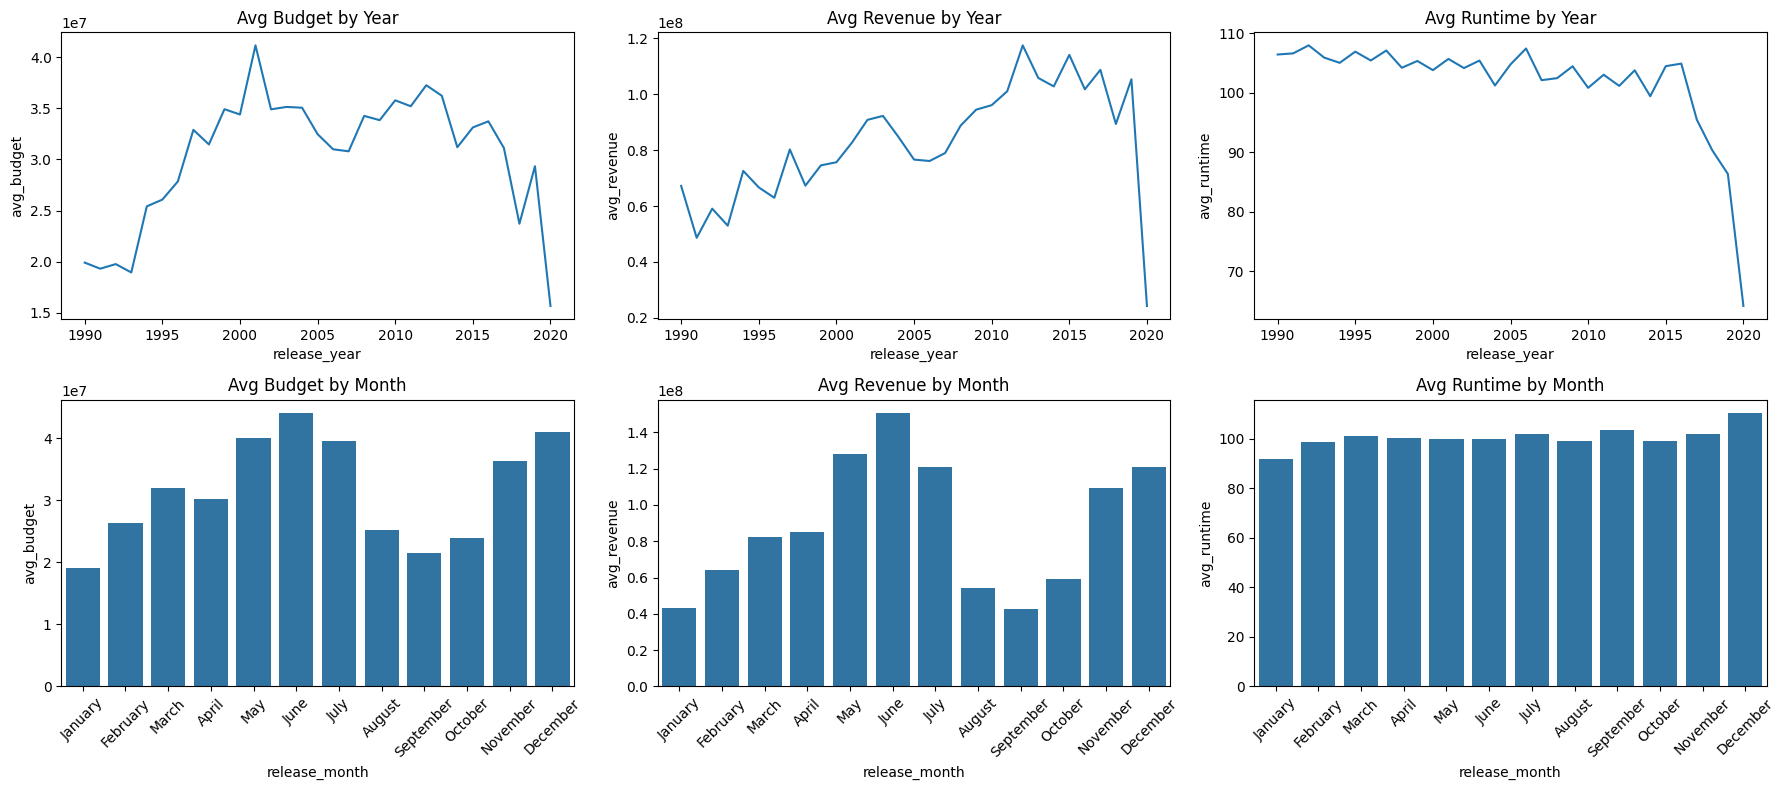

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# By Year
sns.lineplot(data=stats_years, x='release_year', y='avg_budget', ax=axes[0, 0])
axes[0, 0].set_title('Avg Budget by Year')
sns.lineplot(data=stats_years, x='release_year', y='avg_revenue', ax=axes[0, 1])
axes[0, 1].set_title('Avg Revenue by Year')
sns.lineplot(data=stats_years, x='release_year', y='avg_runtime', ax=axes[0, 2])
axes[0, 2].set_title('Avg Runtime by Year')

# By Month
sns.barplot(data=stats_months, x='release_month', y='avg_budget', ax=axes[1, 0])
axes[1, 0].set_title('Avg Budget by Month')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.barplot(data=stats_months, x='release_month', y='avg_revenue', ax=axes[1, 1])
axes[1, 1].set_title('Avg Revenue by Month')
axes[1, 1].tick_params(axis='x', rotation=45)

sns.barplot(data=stats_months, x='release_month', y='avg_runtime', ax=axes[1, 2])
axes[1, 2].set_title('Avg Runtime by Month')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [25]:
# Replace NaNs with an empty string to avoid errors
data['genres_clean'] = data['genres'].fillna('')

# Initialize the CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '), binary=True)

# Transform into matrix with data_genres_train
data_genres_train = data[data.genres_clean!='']
genre_matrix = vectorizer.fit_transform(data_genres_train['genres_clean'])

# get feature names
genre_labels = vectorizer.get_feature_names_out()

# convert to pd df
genre_df = pd.DataFrame(genre_matrix.toarray(), columns=genre_labels, index=data_genres_train.index)

# concat
data_genres = pd.concat([data_genres_train, genre_df], axis=1)


/home/elbaz/Bureau/tmdb_data_eda/.venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [26]:
# group by years and apply the sum
genre_by_year = data_genres.groupby('release_year')[genre_labels].sum()

# Normalize to proportions per month
genre_by_year = genre_by_year.div(genre_by_year.sum(axis=1), axis=0).reset_index()

# Melt into long format for Plotly
genre_melted = genre_by_year.melt(
    id_vars='release_year',
    value_vars=genre_labels,
    var_name='Genre',
    value_name='Proportion'
)

# Create the stacked bar chart
fig = px.bar(
    genre_melted,
    x='release_year',
    y='Proportion',
    color='Genre',
    title='Distribution Genres per Year',
    labels={'release_month': 'Year', 'Proportion': 'Proportion'}
)

fig.update_layout(barmode='stack', xaxis_tickangle=45, height=600)
fig.show()

In [27]:
# Group by month
genre_by_month = data_genres.groupby('release_month')[genre_labels].sum()

# Normalize to proportions per month
genre_by_month = genre_by_month.div(genre_by_month.sum(axis=1), axis=0).reset_index()

# Melt into long format for Plotly
genre_melted = genre_by_month.melt(
    id_vars='release_month',
    value_vars=genre_labels,
    var_name='Genre',
    value_name='Proportion'
)

# Create the stacked bar chart
fig = px.bar(
    genre_melted,
    x='release_month',
    y='Proportion',
    color='Genre',
    title='Distribution Genres per Month',
    category_orders={'release_month': month_order},
    labels={'release_month': 'Month', 'Proportion': 'Proportion'}
)

fig.update_layout(barmode='stack', xaxis_tickangle=45, height=600)
fig.show()

/tmp/ipykernel_123508/1256567775.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Revenue Prediction

we want to predict the revenue of a movie with the budget, runtime, release_month, genres and keywords

# SuperLinked

In [28]:

class MovieSchema(sl.Schema):
    id: sl.IdField
    title: sl.String | None
    rating: sl.Float | None
    release_date: sl.Timestamp | None
    runtime: sl.Integer | None
    overview: sl.String | None
    genres: sl.StringList | None
    keywords: sl.StringList | None
    
# class UserSchema(sl.Schema):
#     id: sl.IdField
#     preference_title: sl.String | None
#     preference_rating: sl.Float | None
#     preference_release_date: sl.Timestamp | None
#     preference_runtime: sl.Integer | None
#     preference_overview: sl.String | None
#     preference_genres: sl.StringList | None
#     preference_keywords: sl.StringList | None

In [29]:
# initialize schemas
movie = MovieSchema()
# user = UserSchema()

In [30]:
l = data.keywords.dropna().unique().tolist()
keywords = []
for e in l:
    keywords.extend(e.split(', '))
kw = list(set(keywords))

In [31]:
# define spaces
title_space = sl.TextSimilaritySpace(
    text=movie.title, 
    model="sentence-transformers/all-MiniLM-L6-v2"
)

rating_space = sl.NumberSpace(
    number=movie.rating, 
    mode=sl.Mode.MAXIMUM, 
    min_value=0.0, 
    max_value=10.0
)

release_date_space = sl.RecencySpace(
    timestamp=movie.release_date,
    period_time_list=[
        sl.PeriodTime(timedelta(days=4 * 365)),
        sl.PeriodTime(timedelta(days=8 * 365)),
        sl.PeriodTime(timedelta(days=16 * 365)),
        sl.PeriodTime(timedelta(days=32 * 365))
    ],
    negative_filter=-0.25
)

runtime_space = sl.NumberSpace(
    number=movie.runtime, 
    mode=sl.Mode.MAXIMUM, 
    min_value=0, 
    max_value=999,
)

overview_space = sl.TextSimilaritySpace(
    text=movie.overview, 
    model="sentence-transformers/all-MiniLM-L6-v2",
)

genres_space = sl.CategoricalSimilaritySpace(
    category_input=movie.genres, 
    categories=list(genre_labels), 
    uncategorized_as_category=False
)

keywords_space = sl.CategoricalSimilaritySpace(
    category_input=movie.keywords, 
    categories=kw,
    uncategorized_as_category=False
)

In [32]:
# create the index
movie_index = sl.Index(
    spaces = [
        title_space,
        rating_space,
        release_date_space,
        runtime_space,
        overview_space,
        genres_space,
        keywords_space
    ],
    fields=[
        movie.release_date
    ]
)

In [33]:
# parse data into schemas
movie_df_parser = sl.DataFrameParser(schema=movie, mapping={movie.rating: "vote_average"})
# user_df_parser = sl.JsonParser(schema=user)

In [34]:
# setup the source - In memory
source_movie: sl.InMemorySource = sl.InMemorySource(movie, parser=movie_df_parser)
# source_user: sl.InMemorySource = sl.InMemorySource(user, parser=user_df_parser)

# set up the executor 
CONTEXT_DATA = {sl.CONTEXT_COMMON: {sl.CONTEXT_COMMON_NOW: int(datetime(2025, 7, 20).timestamp())}}
executor: sl.InMemoryExecutor = sl.InMemoryExecutor(sources=[source_movie], indices=[movie_index], context_data=CONTEXT_DATA)

# define the app
app: sl.InMemoryApp = executor.run()

In [ ]:
# load the actual data into our system
source_movie.put([data[["id", "title", "vote_average", "release_date", "runtime", "overview", "genres", "keywords"]].dropna()])

# source_user.put(
#     [
#         {
#             "id": "user_1", 
#             "preference_title": None, 
#             "preference_rating":None, 
#             "preference_release_date": None,
#             "preference_runtime": None,
#             "preference_overview": "Hold up in a very securized bank",
#             "preference_genres": ["action, thriller", "psychologic"],
#             "preference_keywords": None
#         },
#         {
#             "id": "user_2", 
#             "preference_title": None, 
#             "preference_rating":None, 
#             "preference_release_date": None,
#             "preference_runtime": None,
#             "preference_overview": "Drama about heritage in noble family",
#             "preference_genres": None,
#             "preference_keywords": "adultery"
#         },
#         {
#             "id": "user_3", 
#             "preference_title": None, 
#             "preference_rating":None, 
#             "preference_release_date": None,
#             "preference_runtime": None,
#             "preference_overview": "Hold up in a very securized bank",
#             "preference_genres": ["action, thriller", "psychologic"],
#             "preference_keywords": None  
#         }
#     ]
# )

In [ ]:
# query object
query = (
    sl.Query(
        movie_index,
        weights={
            title_space: sl.Param("title_space_weight"),
            rating_space: sl.Param("rating_space_weight"),
            release_date_space: sl.Param("release_date_space_weight"),
            runtime_space: sl.Param("runtime_space_weight"),
            overview_space: sl.Param("overview_space_weight"),
            genres_space: sl.Param("genres_space_weight"),
            keywords_space: sl.Param("keywords_space_weight")
        },
    )
    .find(movie)
    .similar(title_space, sl.Param("title_query_text"))
    .similar(overview_space, sl.Param("overview_query_text"))
    .similar(genres_space, sl.Param("genres_query_text"))
    .similar(keywords_space, sl.Param("keywords_query_text"))
    .filter(movie.release_date >= sl.Param("release_date_filter_sup", description="release date greater than or equal to"))
    .filter(movie.release_date <= sl.Param("release_date_filter_inf", description="release date less than or equal to"))
    .select_all()
    .limit(sl.Param("limit"))
)

In [ ]:
result = app.query(
    query,
    title_query_text="love",
    overview_query_text="A love story between a man and a woman",
    genres_query_text="drama comedy romantic",
    keywords_query_text="love, romance, comedy",
    release_date_filter_sup=int(datetime(2005, 1, 1).timestamp()),
    release_date_filter_inf=int(datetime(2005, 12, 31).timestamp()),
    title_space_weight=1,
    rating_space_weight=1,
    release_date_space_weight=1,
    runtime_space_weight=1,
    overview_space_weight=1,
    genres_space_weight=1,
    keywords_space_weight=1,
    limit=10,
)

df = sl.PandasConverter.to_pandas(result)
sl.PandasConverter.format_date_column(df, "release_date", "release_year", year_only=True)
df

In [ ]:
# fill this with your API key - this will drive param extraction
import os
openai_config = sl.OpenAIClientConfig(api_key=os.environ["OPENAI_API_KEY"], model="gpt-4o")


In [ ]:
nlq_query = query.with_natural_query(sl.Param("natural_query"), openai_config)

In [ ]:
nlq_result = app.query(
    nlq_query,
    natural_query="10 most rating movies with release dates between 01-01-2005 and 31-12-2005 in integer timestamp format of genre action and thriller with aliens in the scenario",
    # title_space_weight=1,
    # rating_space_weight=1,
    # release_date_space_weight=1,
    # runtime_space_weight=1,
    # overview_space_weight=1,
    # genres_space_weight=1,
    # keywords_space_weight=1,
    limit=10,
)

df = sl.PandasConverter.to_pandas(nlq_result)
sl.PandasConverter.format_date_column(df, "release_date", "release_year", year_only=True)
df

In [ ]:
nlq_result.metadata.search_params